<a href="https://colab.research.google.com/github/NgdHung31/Real_Estate_Regession_Deep_Learning/blob/main/Kaggle_KerassRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hose Sales Prediction (Machine learning)

In [ ]:
%pip install gdown -U -q
%pip install scikit-learn==0.24.2

# %pip install tensorflow -U -q
!gdown --id 1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG --output "dataset_non_outliers_Price_Area.csv"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H98Xv24pGw9jTQO5sJsp6X8xRPfrxiHG
To: /content/dataset_non

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [ ]:
# read the csv file
Data = pd.read_csv(
    'dataset_non_outliers_Price_Area.csv', low_memory=False)

# Exploratory Data Analysis

In [ ]:
Data.head(5)

,Property_type,Area,Width,Length,Frontage,Number_of_floors,Number_of_bedrooms,Number_of_toilets,Legal_status,Furniture,...,Posting_date,Expiry_date,Type_of_listing,Project_name,Street,Ward,District,Province,Distance,Price
0,Nhà biệt thự,80.0,NaN,NaN,NaN,3.0,4.0,3,Đã có sổ,Có nội thất,...,1/11/2023,16/11/2023,Tin thường,Dự án Lovera Park,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,6.5
1,Nhà biệt thự,80.0,NaN,NaN,6.0,3.0,3.0,3,Đã có sổ,Có nội thất,...,31/10/2023,7/11/2023,Tin VIP Bạc,Dự án Khang Điền Bình Chánh,Đường Trịnh Quang Nghị,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,7.9
2,Nhà biệt thự,136.5,NaN,NaN,7.0,3.0,4.0,4,Đã có sổ,Có nội thất,...,30/10/2023,14/11/2023,Tin VIP Bạc,Dự án KDC Phong Phú 5,Đường Số 5,Xã Phong Phú,Bình Chánh,TP Hồ Chí Minh,9.623252,10.8
3,Nhà biệt thự,95.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,20/10/2023,4/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6
4,Nhà biệt thự,90.0,NaN,NaN,NaN,5.0,5.0,4,Đã có sổ,Không có nội thất,...,30/10/2023,14/11/2023,Tin thường,Unknown,Đường Quách Điêu,Xã Vĩnh Lộc A,Bình Chánh,TP Hồ Chí Minh,14.245030,7.6


In [ ]:
#get some information about our DataSet
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47637 entries, 0 to 47636
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        47637 non-null  object 
 1   Area                 47637 non-null  float64
 2   Width                3205 non-null   float64
 3   Length               1648 non-null   float64
 4   Frontage             8695 non-null   float64
 5   Number_of_floors     20686 non-null  float64
 6   Number_of_bedrooms   41687 non-null  float64
 7   Number_of_toilets    36947 non-null  object 
 8   Legal_status         47637 non-null  object 
 9   Furniture            47637 non-null  object 
 10  House_orientation    11611 non-null  object 
 11  Balcony_orientation  6539 non-null   object 
 12  Access_road          8451 non-null   float64
 13  Posting_date         47637 non-null  object 
 14  Expiry_date          26859 non-null  object 
 15  Type_of_listing      26898 non-null 

,count,mean,std,min,25%,50%,75%,max
Area,47637.0,74.756512,28.897334,7.000000,55.000000,70.000000,90.000000,161.000000
Width,3205.0,4.931357,7.158506,2.000000,4.000000,4.000000,5.000000,350.000000
Length,1648.0,15.070631,9.356820,1.000000,11.000000,14.000000,18.000000,222.500000
Frontage,8695.0,5.570094,12.226474,1.000000,4.000000,4.800000,6.000000,980.000000
Number_of_floors,20686.0,3.145702,1.314078,1.000000,2.000000,3.000000,4.000000,9.000000
Number_of_bedrooms,41687.0,3.038117,2.118783,1.000000,2.000000,2.000000,4.000000,57.000000
Access_road,8451.0,10.108733,9.184272,1.050000,5.000000,8.000000,12.000000,322.000000
Distance,47637.0,7.362353,3.917916,0.449674,4.274879,6.949138,9.636417,49.613941
Price,47637.0,7.174582,6.590799,0.010000,2.600000,4.700000,9.000000,33.000000


In [ ]:
Data.shape

(47637, 23)

In [ ]:
#let's drop unnecessory featurs
#Data = Data.drop('id',axis=1)
#Data = Data.drop('zipcode',axis=1)

In [ ]:
# check if there are any Null values
Data.isnull().sum()

Property_type              0
Area                       0
Width                  44432
Length                 45989
Frontage               38942
Number_of_floors       26951
Number_of_bedrooms      5950
Number_of_toilets      10690
Legal_status               0
Furniture                  0
House_orientation      36026
Balcony_orientation    41098
Access_road            39186
Posting_date               0
Expiry_date            20778
Type_of_listing        20739
Project_name           25214
Street                  1461
Ward                       0
District                   0
Province                   0
Distance                   0
Price                      0
dtype: int64

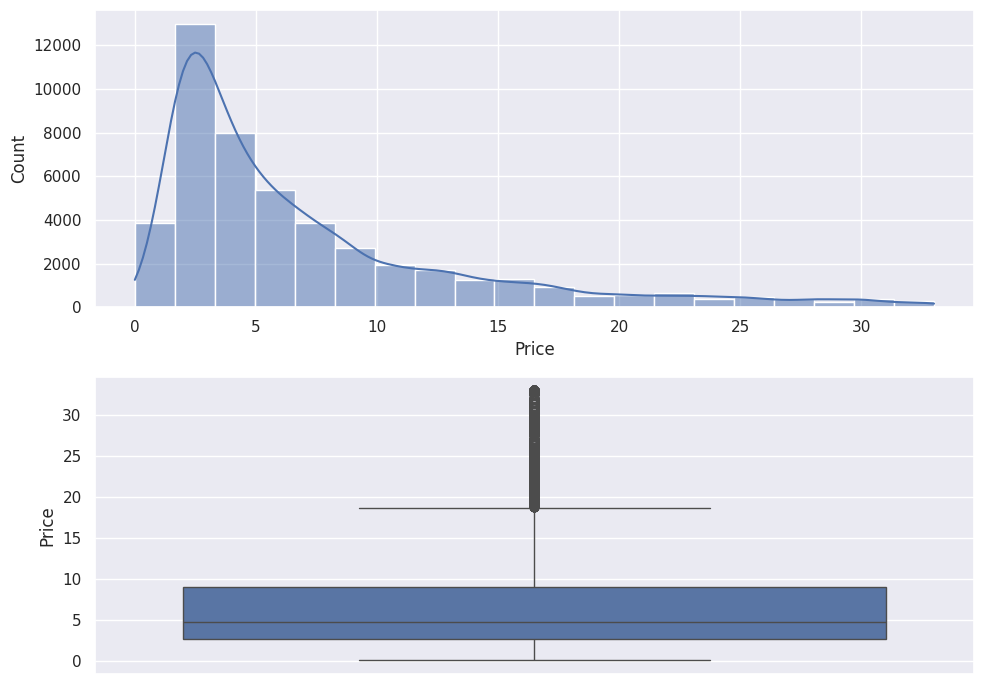

In [ ]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(Data['Price'], kde=True, bins=20)
fig.add_subplot(2,1,2)
sns.boxplot(Data['Price'])
plt.tight_layout()

## Feature Engineer


In [ ]:
Data = Data.drop(labels=['Frontage','Street', 'Ward', 'Province', 'Width', 'Length', 'House_orientation', 'Balcony_orientation', 'Access_road', 'Posting_date', 'Expiry_date', 'Type_of_listing'], axis=1)

Data.loc[Data["Property_type"] == "Chung cư", "Number_of_floors"] = 1
Data.loc[pd.isnull(Data["Project_name"]), "Project_name"] = "Other"

Data.isnull().sum()

Property_type             0
Area                      0
Number_of_floors       7146
Number_of_bedrooms     5950
Number_of_toilets     10690
Legal_status              0
Furniture                 0
Project_name              0
District                  0
Distance                  0
Price                     0
dtype: int64

In [ ]:
Data = Data.rename(columns={'Number_of_floors': 'Floors',
                   'Number_of_bedrooms': 'Bedrooms',
                   'Number_of_toilets': 'Toilets'})

# Convert object value to numeric value
Data['Toilets'] = Data['Toilets'].replace('Nhiều hơn 6 phòng', 7)
Data['Toilets'] = pd.to_numeric(Data['Toilets'], errors='coerce')

In [ ]:
Data = Data.dropna()

<ipython-input-13-18e5b29e6471>:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


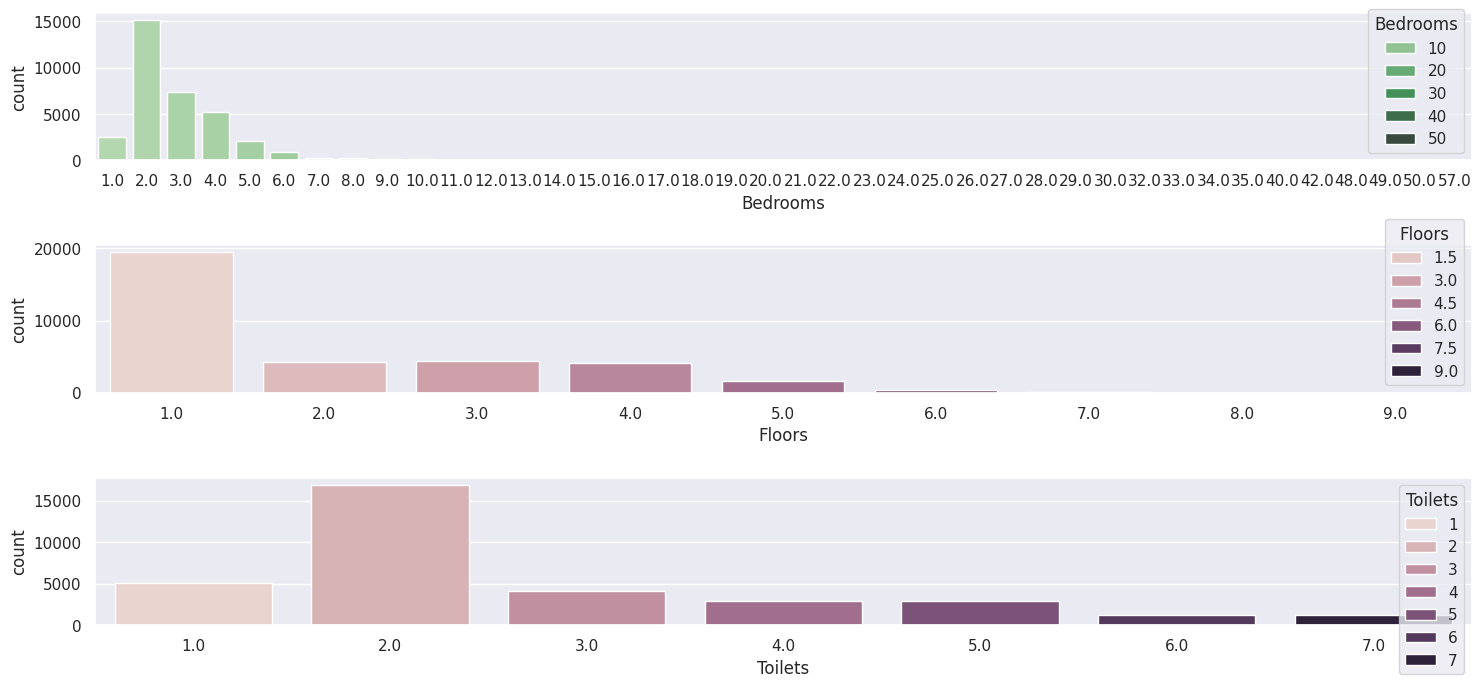

In [ ]:
#visualizing bedrooms, bathrooms, floors,grades
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(3,1,1)
sns.countplot(x='Bedrooms', hue='Bedrooms', data=Data,
              palette='Greens_d', legend=True)
fig.add_subplot(3,1,2)
sns.countplot(x='Floors', hue='Floors', data=Data)
fig.add_subplot(3,1,3)
sns.countplot(x='Toilets', hue='Toilets', data=Data)
plt.tight_layout()

# Encoding the values

In [ ]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Index: 34410 entries, 0 to 47636
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_type  34410 non-null  object 
 1   Area           34410 non-null  float64
 2   Floors         34410 non-null  float64
 3   Bedrooms       34410 non-null  float64
 4   Toilets        34410 non-null  float64
 5   Legal_status   34410 non-null  object 
 6   Furniture      34410 non-null  object 
 7   Project_name   34410 non-null  object 
 8   District       34410 non-null  object 
 9   Distance       34410 non-null  float64
 10  Price          34410 non-null  float64
dtypes: float64(6), object(5)
memory usage: 3.2+ MB


,count,mean,std,min,25%,50%,75%,max
Area,34410.0,73.076312,27.666187,7.000000,55.00000,70.000000,86.000000,161.000000
Floors,34410.0,2.007672,1.367598,1.000000,1.00000,1.000000,3.000000,9.000000
Bedrooms,34410.0,3.020750,2.125978,1.000000,2.00000,2.000000,4.000000,57.000000
Toilets,34410.0,2.711915,1.513549,1.000000,2.00000,2.000000,3.000000,7.000000
Distance,34410.0,7.397858,3.739400,0.449674,4.36009,6.950851,9.636417,49.613941
Price,34410.0,6.065347,5.539944,0.010000,2.45000,4.000000,7.600000,33.000000


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of OrdinalEncoder
Encoder = OrdinalEncoder()
Encoder.set_params(encoded_missing_value=-1)

Categorical_columns = ['Property_type', 'Legal_status', 'Furniture', 'Project_name', 'District']

# Fit the encoder to your data
Encoder.fit(Data[Categorical_columns])

# Transform your data using the encoder
Data[Categorical_columns] = Encoder.transform(Data[Categorical_columns])

# Print the encoded data
Data.head()

,Property_type,Area,Floors,Bedrooms,Toilets,Legal_status,Furniture,Project_name,District,Distance,Price
0,1.0,80.0,3.0,4.0,3.0,3.0,1.0,428.0,0.0,9.623252,6.5
1,1.0,80.0,3.0,3.0,3.0,3.0,1.0,393.0,0.0,9.623252,7.9
2,1.0,136.5,3.0,4.0,4.0,3.0,1.0,385.0,0.0,9.623252,10.8
3,1.0,95.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6
4,1.0,90.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6


In [ ]:
## Sử dụng model Machine Learning để dự đoán giá trị bị thiếu
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


cols = ['Property_type', 'Area', 'Floors', 'Bedrooms', 'Toilets']
impute_it = IterativeImputer()
Data[cols] = impute_it.fit_transform(Data[cols])

Data.isnull().sum()

Property_type    0
Area             0
Floors           0
Bedrooms         0
Toilets          0
Legal_status     0
Furniture        0
Project_name     0
District         0
Distance         0
Price            0
dtype: int64

In [ ]:
Data.head(10)

,Property_type,Area,Floors,Bedrooms,Toilets,Legal_status,Furniture,Project_name,District,Distance,Price
0,1.0,80.0,3.0,4.0,3.0,3.0,1.0,428.0,0.0,9.623252,6.5
1,1.0,80.0,3.0,3.0,3.0,3.0,1.0,393.0,0.0,9.623252,7.9
2,1.0,136.5,3.0,4.0,4.0,3.0,1.0,385.0,0.0,9.623252,10.8
3,1.0,95.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6
4,1.0,90.0,5.0,5.0,4.0,3.0,2.0,1063.0,0.0,14.245030,7.6
6,1.0,80.0,3.0,4.0,3.0,3.0,1.0,428.0,0.0,9.623252,6.5
7,1.0,75.0,3.0,3.0,3.0,3.0,1.0,428.0,0.0,9.623252,5.5
8,1.0,105.0,3.0,3.0,3.0,3.0,1.0,428.0,0.0,9.623252,6.8
9,1.0,105.0,3.0,3.0,3.0,3.0,1.0,428.0,0.0,9.623252,7.0
10,1.0,100.0,3.0,5.0,4.0,0.0,2.0,457.0,0.0,6.809443,9.2


In [ ]:
Data.shape

(34410, 11)

# Scaling and Train Test Split


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [ ]:
X = Data.drop('Price',axis = 1).values
y = Data['Price'].values

#splitting Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (27528, 10)
Test size:  (6882, 10)


# Feature Scalling

In [ ]:

from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float64))
X_test = s_scaler.transform(X_test.astype(np.float64))

## Linear Regression

In [ ]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_var)

regressor.intercept_
regressor.coef_


Mean Absolute Error: 2.217330996725361
Mean Squared Error: 10.965266585073081
R-squared: 0.6363602773417687
Root Mean Squared Error: 3.31138439101731
Explained Variance Score: 0.6364231848833262


array([ 0.42590134,  2.49594352,  2.64132312,  0.14723824,  0.33628463,
       -0.19828434,  0.03035632, -0.14584957,  0.14835528, -1.17952465])

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Định nghĩa phạm vi các siêu tham số
param_distributions = {
    'n_estimators': [5, 6, 7, 8, 9, 10, 30, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [1, 4, 5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 30, 50, 100],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Khởi tạo mô hình RandomForestRegressor
rf_model = RandomForestRegressor()

# Khởi tạo RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=param_distributions,
                               n_iter=100,  # Số lượng tổ hợp siêu tham số cần thử
                               cv=3,  # Số lượng folds trong cross-validation
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)  # Sử dụng tất cả các CPU có sẵn

# Huấn luyện mô hình RandomizedSearchCV
rf_random.fit(X_train, y_train)

# In ra siêu tham số tốt nhất
print("Best parameters found: ", rf_random.best_params_)

# Dùng mô hình tốt nhất để dự đoán trên tập kiểm tra
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_test, y_pred)

# In kết quả đánh giá
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_var)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
117 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
117 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Mean Absolute Error: 1.1324362916552122
Mean Squared Error: 4.275041791012345
R-squared: 0.8582273400126627
Root Mean Squared Error: 2.0676174189178096
Explained Variance Score: 0.8582617864374316


         Feature  Importance
1           Area    0.219221
4        Toilets    0.174509
9       Distance    0.155820
3       Bedrooms    0.128086
0  Property_type    0.118030
2         Floors    0.100082
8       District    0.054402
7   Project_name    0.033962
5   Legal_status    0.009178
6      Furniture    0.006711


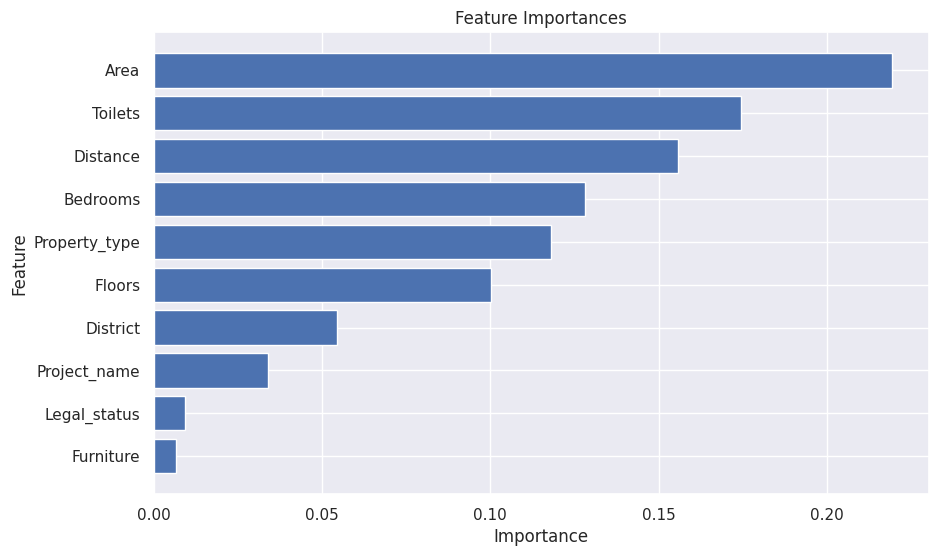

In [ ]:
# Tính toán tầm quan trọng của các đặc trưng
feature_importances = best_rf_model.feature_importances_

# Giả sử bạn có danh sách tên các đặc trưng
feature_names = ['Property_type', 'Area', 'Floors', 'Bedrooms', 'Toilets',
       'Legal_status', 'Furniture', 'Project_name', 'District', 'Distance']

# Chuyển đổi tầm quan trọng của các đặc trưng thành DataFrame để hiển thị dễ dàng
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sắp xếp các đặc trưng theo thứ tự giảm dần của tầm quan trọng
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Hiển thị tầm quan trọng của các đặc trưng
print(feature_importances_df)

# Vẽ biểu đồ tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Define the hyperparameter grid
param_distributions = {
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

# Instantiate DecisionTreeRegressor model
dt_model = DecisionTreeRegressor()

# Instantiate RandomizedSearchCV
dt_random = RandomizedSearchCV(estimator=dt_model,
                               param_distributions=param_distributions,
                               n_iter=100,  # Number of parameter settings that are sampled
                               cv=3,  # Cross-validation folds
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)  # Use all available CPUs

# Fit RandomizedSearchCV
dt_random.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", dt_random.best_params_)

# Use the best model to predict on the test set
best_dt_model = dt_random.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("Decision Tree Regression - Best Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_var)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'min_samples_split': 20, 'min_samples_leaf': 6, 'max_depth': 40}
Decision Tree Regression - Best Model Evaluation:
Mean Absolute Error: 1.3774057279896077
Mean Squared Error: 6.162808094406688
R-squared: 0.7956235893711274
Root Mean Squared Error: 2.482500371481682
Explained Variance Score: 0.7956547959475125


## KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Define the KNN model
knn_model = KNeighborsRegressor()

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_neighbors': list(range(1, 21)),  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
}

# Instantiate RandomizedSearchCV
knn_random = RandomizedSearchCV(estimator=knn_model,
                                param_distributions=param_distributions,
                                n_iter=100,  # Number of parameter settings that are sampled
                                cv=3,  # Cross-validation folds
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)  # Use all available CPUs

# Fit RandomizedSearchCV on the training data
knn_random.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", knn_random.best_params_)

# Use the best model to predict on the test set
best_knn_model = knn_random.best_estimator_
y_pred = best_knn_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("K-Nearest Neighbors Regression - Best Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_var)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'weights': 'distance', 'p': 1, 'n_neighbors': 12, 'algorithm': 'brute'}
K-Nearest Neighbors Regression - Best Model Evaluation:
Mean Absolute Error: 1.239272723731326
Mean Squared Error: 5.337221352812214
R-squared: 0.8230024160886109
Root Mean Squared Error: 2.310242704308838
Explained Variance Score: 0.8231214907423655


## XGBoost


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np

# Instantiate XGBRegressor model
xgb_model = XGBRegressor()

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting rounds
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],  # Maximum depth of each tree
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  # Learning rate
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5, 1.0]  # L2 regularization term on weights
}

# Instantiate RandomizedSearchCV
xgb_random = RandomizedSearchCV(estimator=xgb_model,
                                param_distributions=param_distributions,
                                n_iter=100,  # Number of parameter settings that are sampled
                                cv=3,  # Cross-validation folds
                                verbose=2,
                                random_state=42,
                                n_jobs=-1)  # Use all available CPUs

# Fit RandomizedSearchCV on the training data
xgb_random.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", xgb_random.best_params_)

# Use the best model to predict on the test set
best_xgb_model = xgb_random.best_estimator_
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
explained_var = explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("XGBoost Regression - Best Model Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Root Mean Squared Error:", rmse)
print("Explained Variance Score:", explained_var)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 1.0, 'n_estimators': 400, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}
XGBoost Regression - Best Model Evaluation:
Mean Absolute Error: 1.1472536459877822
Mean Squared Error: 4.0768985355298755
R-squared: 0.8647983392593503
Root Mean Squared Error: 2.0191331148613942
Explained Variance Score: 0.8648229650602641
